In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('ESS11/ESS11.csv', low_memory=False)
dataset.head()

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,rinwe,inwde,jinws,jinwe,inwtm,mode,domain,prob,stratum,psu
0,ESS11e02,11,2.0,20.11.2024,50014,AT,1.185115,0.392891,0.330915,0.130013,...,NaN,2023-11-12 15:26:55,2023-11-12 15:21:28,2023-11-12 15:26:55,30.0,1,2.0,0.000579,107,317
1,ESS11e02,11,2.0,20.11.2024,50030,AT,0.609898,0.325153,0.330915,0.107598,...,NaN,2023-10-18 10:44:18,2023-10-18 10:42:22,2023-10-18 10:44:18,40.0,1,1.0,0.001124,69,128
2,ESS11e02,11,2.0,20.11.2024,50057,AT,1.392330,4.000023,0.330915,1.323666,...,NaN,2023-09-30 14:13:33,2023-09-30 14:08:31,2023-09-30 14:13:33,42.0,1,2.0,0.000493,18,418
3,ESS11e02,11,2.0,20.11.2024,50106,AT,0.556061,0.176228,0.330915,0.058316,...,NaN,2023-06-30 15:11:21,2023-06-30 15:08:05,2023-06-30 15:11:21,34.0,1,1.0,0.001233,101,295
4,ESS11e02,11,2.0,20.11.2024,50145,AT,0.722795,1.060940,0.330915,0.351080,...,NaN,2023-07-11 11:14:03,2023-07-11 11:10:02,2023-07-11 11:14:03,57.0,1,2.0,0.000949,115,344


### Italy

In [2]:
dsITA = dataset[dataset['cntry'] == 'IT']
dsITA = dsITA.dropna(axis= 1, how='all')
dsITA.head()

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,kinwe,inwde,jinws,jinwe,inwtm,mode,domain,prob,stratum,psu
24596,ESS11e02,11,2.0,20.11.2024,50021,IT,0.934106,0.726033,1.802901,1.308966,...,2024-02-14 14:07:08,2024-02-14 14:11:00,2024-02-14 14:07:28,2024-02-14 14:10:54,50.0,1,2.0,0.000124,934,11956
24597,ESS11e02,11,2.0,20.11.2024,50036,IT,0.881058,0.620133,1.802901,1.118038,...,2023-12-20 17:28:33,2023-12-20 17:30:00,2023-12-20 17:28:56,2023-12-20 17:29:46,52.0,1,2.0,0.000131,958,11958
24598,ESS11e02,11,2.0,20.11.2024,50041,IT,0.938100,1.116000,1.802901,2.012036,...,2023-11-29 17:45:08,2023-11-29 17:45:55,2023-11-29 17:45:16,2023-11-29 17:45:47,70.0,1,2.0,0.000123,940,12101
24599,ESS11e02,11,2.0,20.11.2024,50047,IT,1.003541,0.798025,1.802901,1.438759,...,2024-04-08 16:44:43,2024-04-08 16:46:12,2024-04-08 16:45:03,2024-04-08 16:46:07,44.0,1,2.0,0.000115,938,12082
24600,ESS11e02,11,2.0,20.11.2024,50057,IT,0.955288,1.100172,1.802901,1.983501,...,2023-12-31 21:29:55,2023-12-31 21:31:01,2023-12-31 21:30:09,2023-12-31 21:30:56,63.0,1,2.0,0.000121,943,12120


In [3]:
colm = ['netusoft','ppltrst','pplfair','pplhlp']
colm2 = ['nwspol', 'netustm']
ds1 = dsITA[colm]
ds3 = dsITA[colm2]

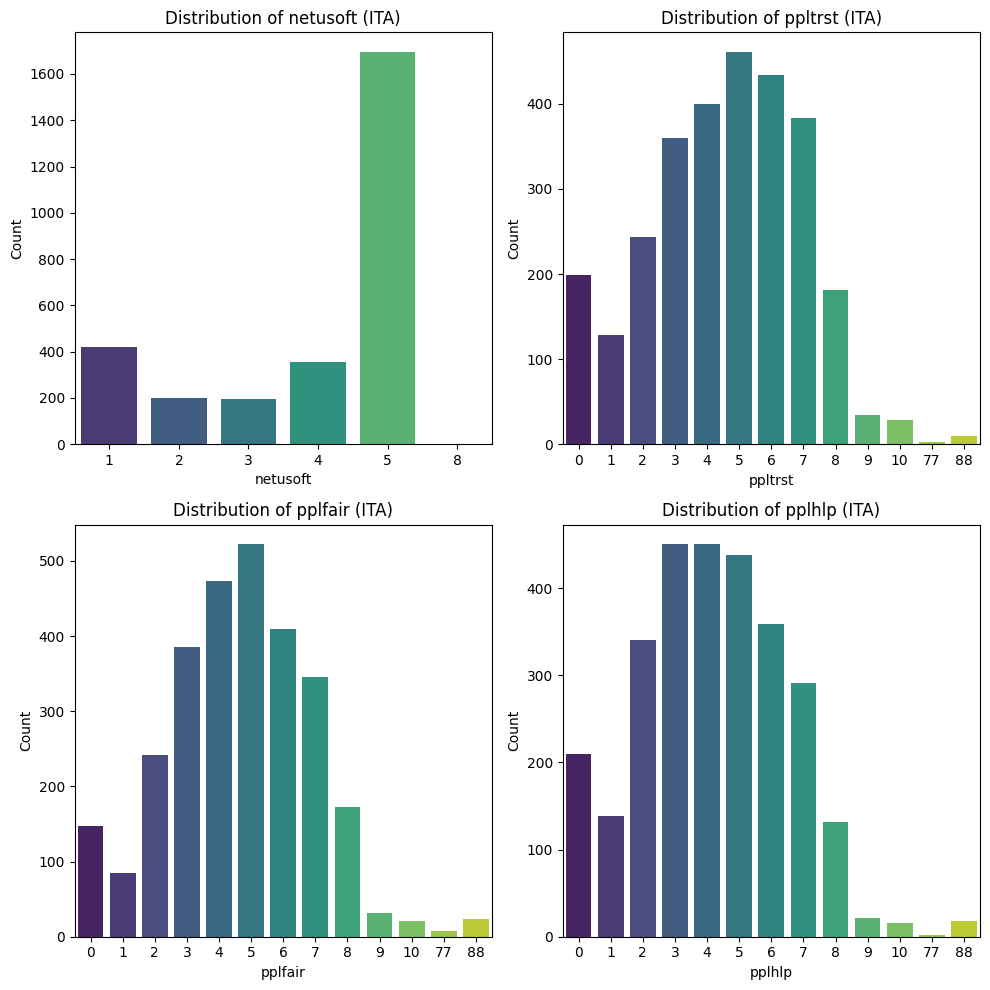

In [4]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

fig, axes = plt.subplots(2, 2, figsize = (10, 10))
axes = axes.flatten()

for i, col in enumerate(colm):
   sns.countplot(data=ds1, x = col, ax=axes[i], palette='viridis')
   axes[i].set_title(f'Distribution of {col} (ITA)')
   axes[i].set_xlabel(col)
   axes[i].set_ylabel('Count')
   
   # unique_values = ds1[col].dropna().unique()
   # legend_labels = [str(val) for val in unique_values]
   # axes[i].legend(legend_labels, title=f'{col} Values', loc='upper right')
   
plt.tight_layout()
plt.show()

In [5]:
values_remove = [6666,7777,8888,9999]
ds3_new = ds3[~ds3['nwspol'].isin(values_remove)]
ds3_new = ds3_new[~ds3_new['netustm'].isin(values_remove)]

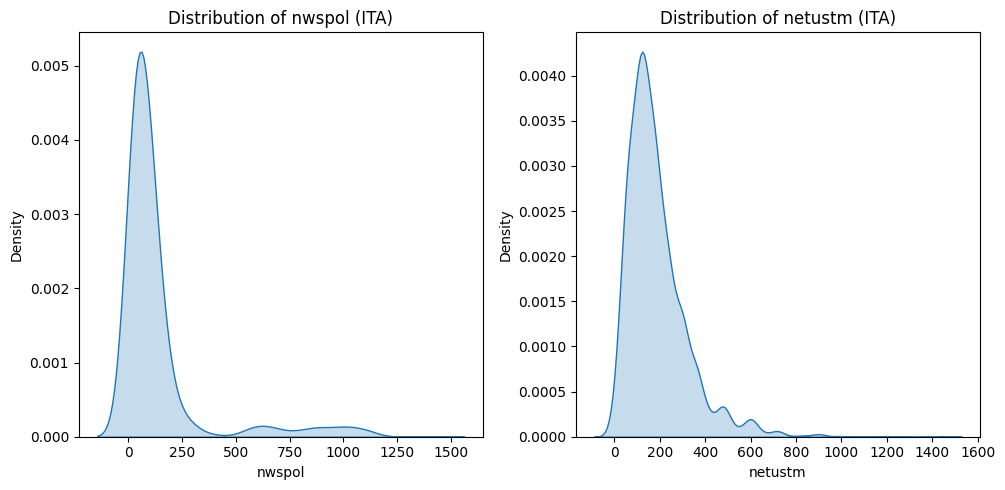

In [6]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes = axes.flatten()

for i, col in enumerate(colm2):
    sns.kdeplot(data=ds3_new, x=col, ax=axes[i], fill=True, palette='viridis')
    axes[i].set_title(f'Distribution of {col} (ITA)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [7]:
# explore = dsITA.columns
# for i in explore:
#    print(i)

In [8]:
col2 = [
    "polintr", "psppsgva", "actrolga", "psppipla", "cptppola", 
    "trstprl", "trstlgl", "trstplc", "trstplt", "trstprt", 
    "trstep", "trstun", "vote", "prtvteit", "contplt", 
    "donprty", "badge", "sgnptit", "pbldmna", "bctprd", 
    "pstplonl", "volunfp", "clsprty", "prtclfit", "prtdgcl", 
    "lrscale", "stflife", "stfeco", "stfgov", "stfdem", 
    "stfedu", "stfhlth", "gincdif", "freehms", "hmsfmlsh", 
    "hmsacld", "euftf", "lrnobed", "loylead", "imsmetn", 
    "imdfetn", "impcntr", "imbgeco", "imueclt", "imwbcnt"
]
ds2 = dsITA[col2]
ds2

,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,...,hmsacld,euftf,lrnobed,loylead,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt
24596,2,2,3,2,3,5,6,7,5,4,...,2,4,3,2,2,3,3,4,4,4
24597,3,1,2,2,2,3,6,6,3,3,...,2,8,4,5,1,1,1,7,7,7
24598,3,1,2,2,4,5,7,10,4,5,...,4,3,2,3,3,3,3,5,6,3
24599,3,2,1,1,2,8,4,7,5,6,...,4,2,1,2,2,1,2,4,2,3
24600,3,3,2,2,2,1,4,4,5,4,...,7,4,3,3,8,8,3,88,88,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27456,4,1,1,1,1,3,7,8,1,1,...,3,5,2,3,2,3,3,5,3,4
27457,2,2,2,2,2,5,6,6,6,5,...,2,6,2,2,2,2,3,5,5,5
27458,3,1,2,1,3,6,5,7,2,0,...,2,5,2,4,2,2,2,7,88,4
27459,3,3,2,3,3,4,6,6,3,3,...,3,6,3,2,2,2,2,6,7,6


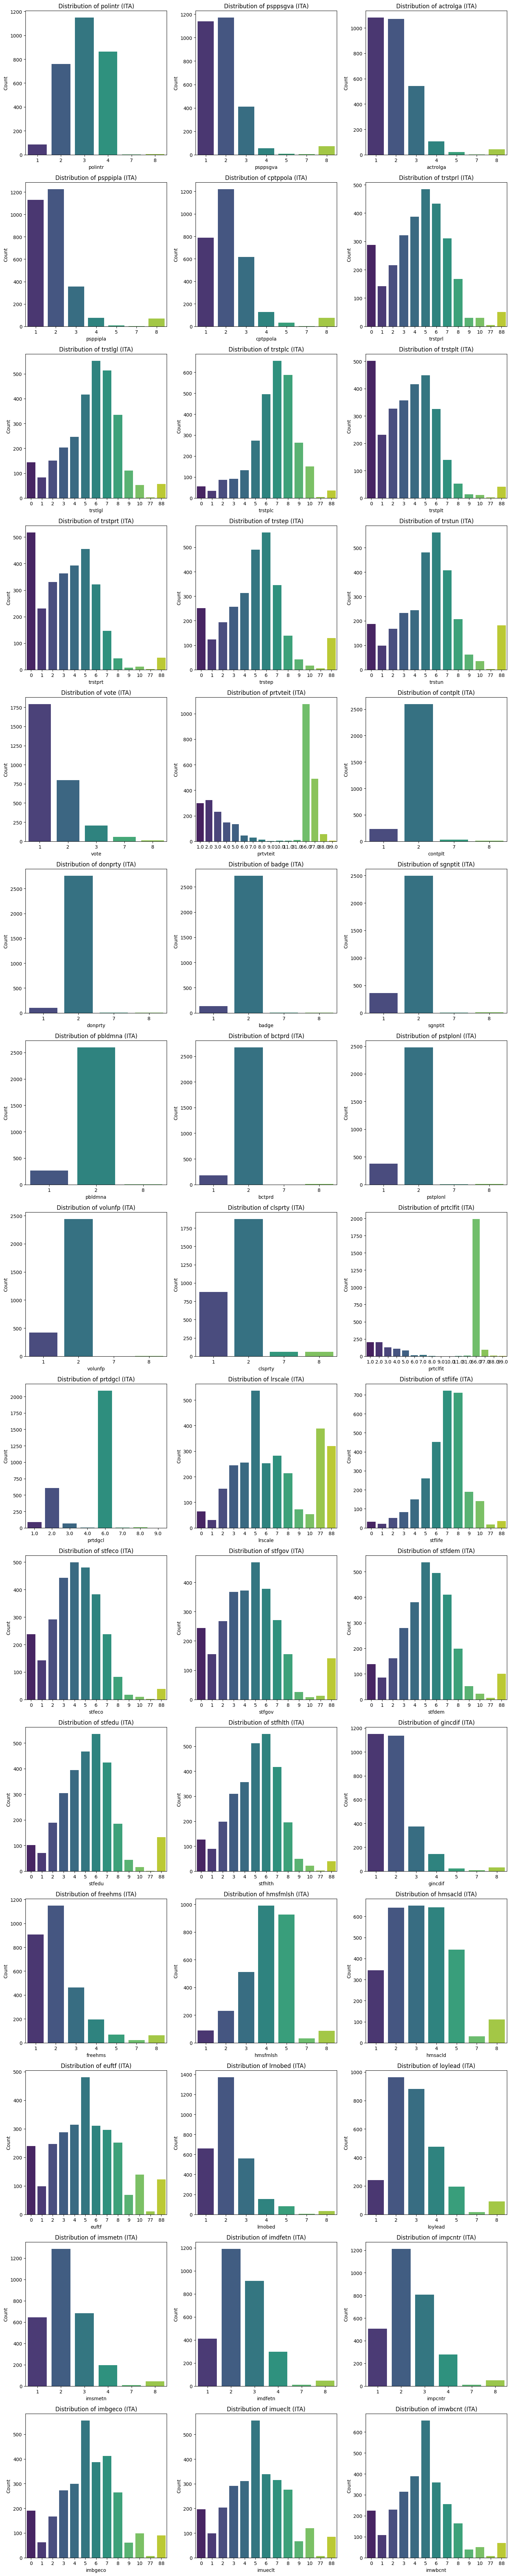

In [9]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

fig, axes = plt.subplots(15, 3, figsize = (15, 75))
axes = axes.flatten()

for i, col in enumerate(col2):
   sns.countplot(data=ds2, x = col, ax=axes[i], palette='viridis')
   axes[i].set_title(f'Distribution of {col} (ITA)')
   axes[i].set_xlabel(col)
   axes[i].set_ylabel('Count')
   
   # unique_values = ds1[col].dropna().unique()
   # legend_labels = [str(val) for val in unique_values]
   # axes[i].legend(legend_labels, title=f'{col} Values', loc='upper right')
   
plt.tight_layout()
plt.show()

### Norway

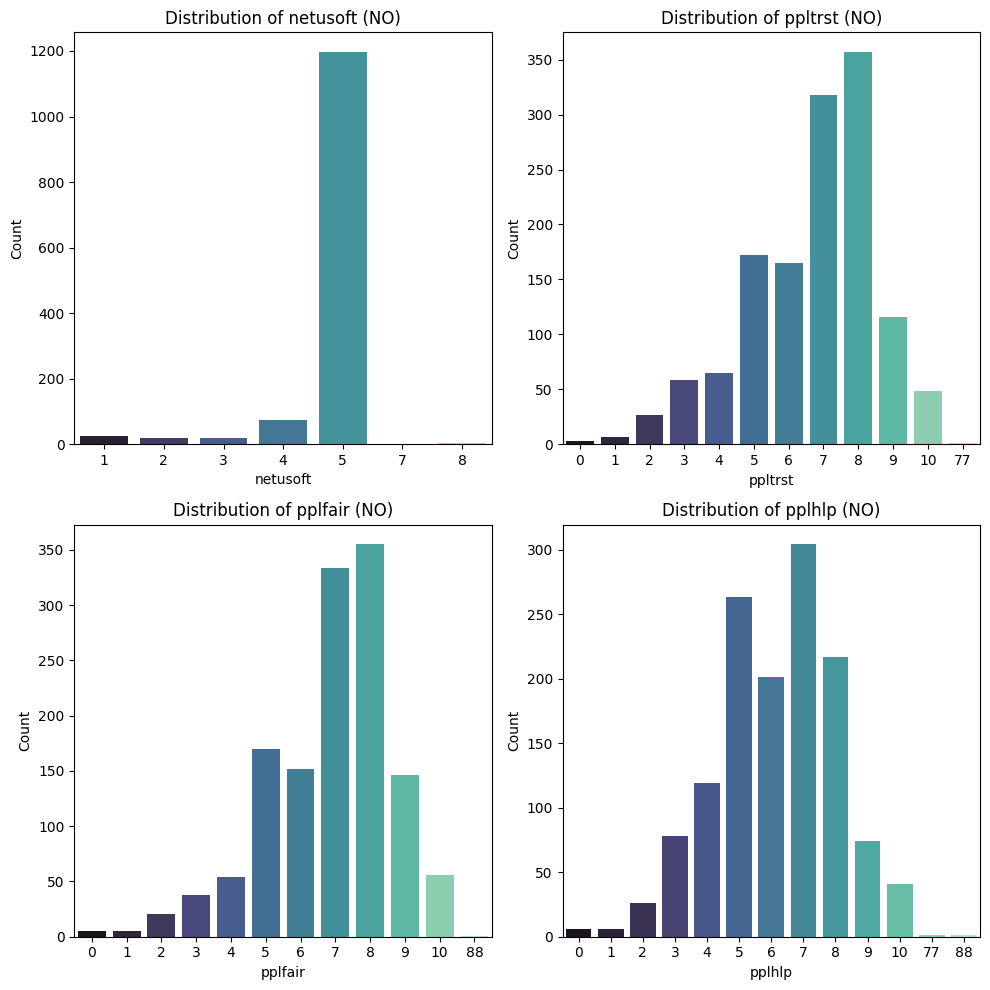

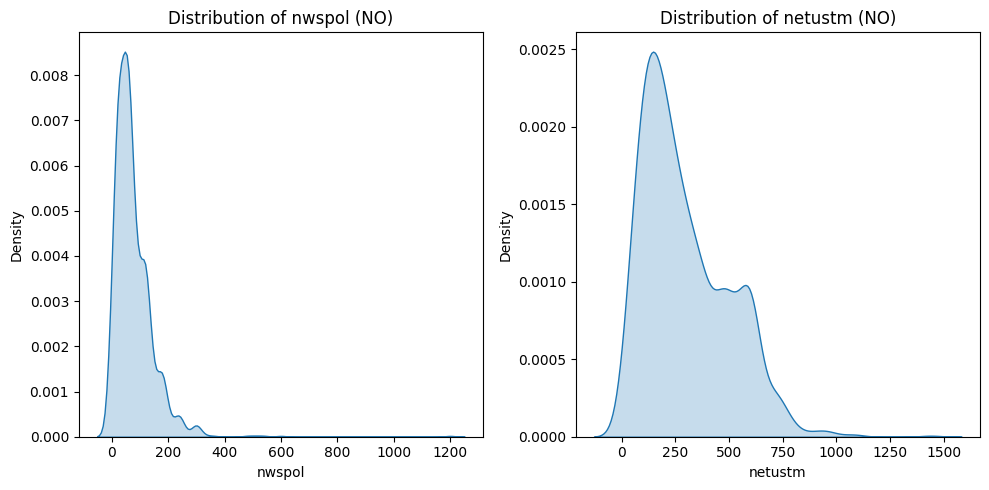

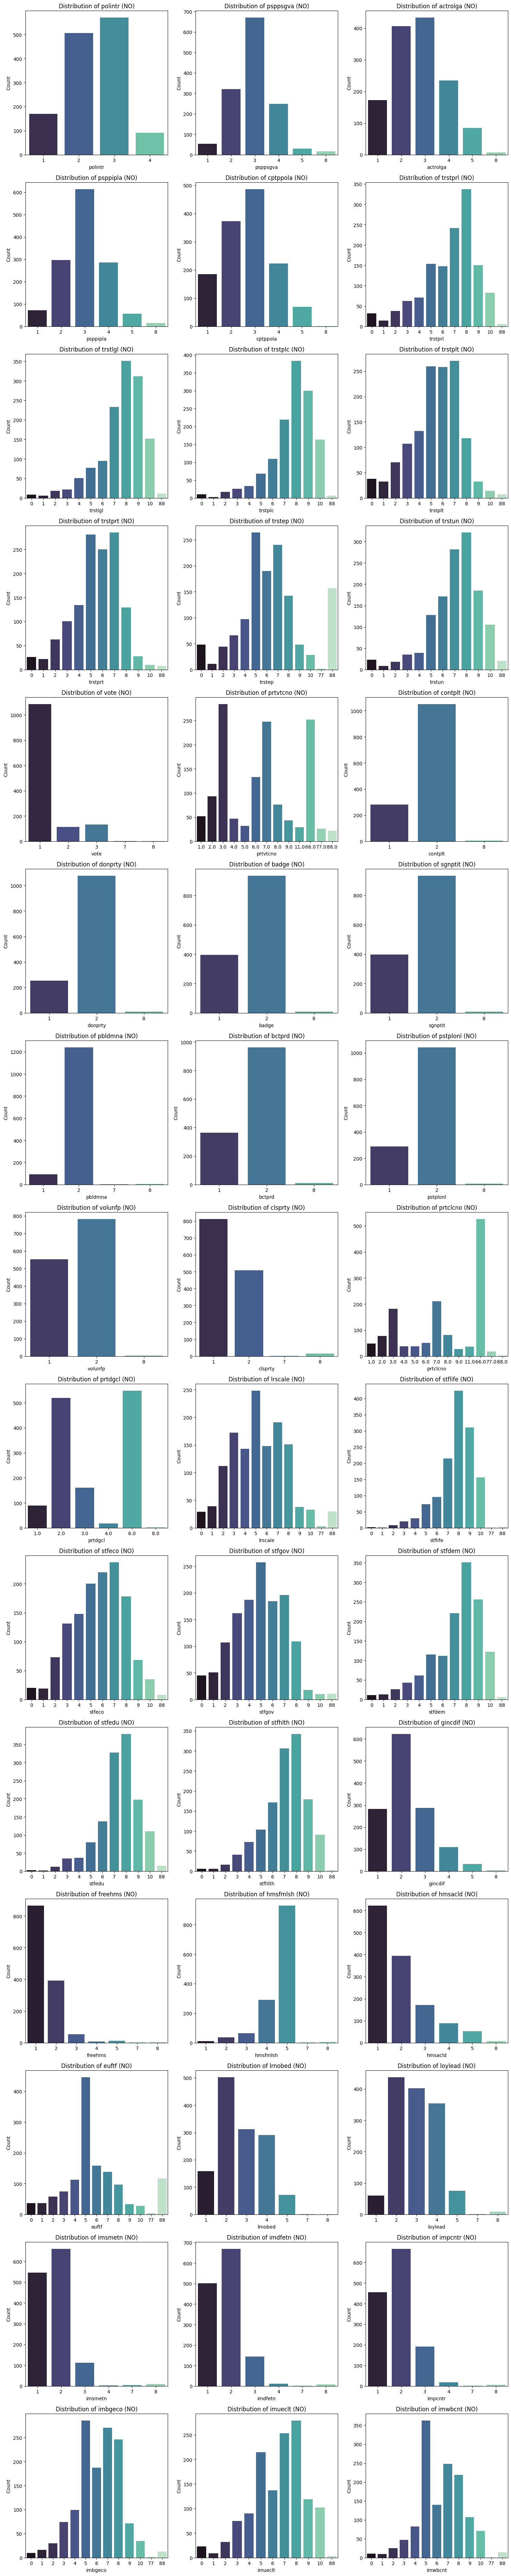

In [1]:
from functions import *

ds_filter_norway()

### Compare

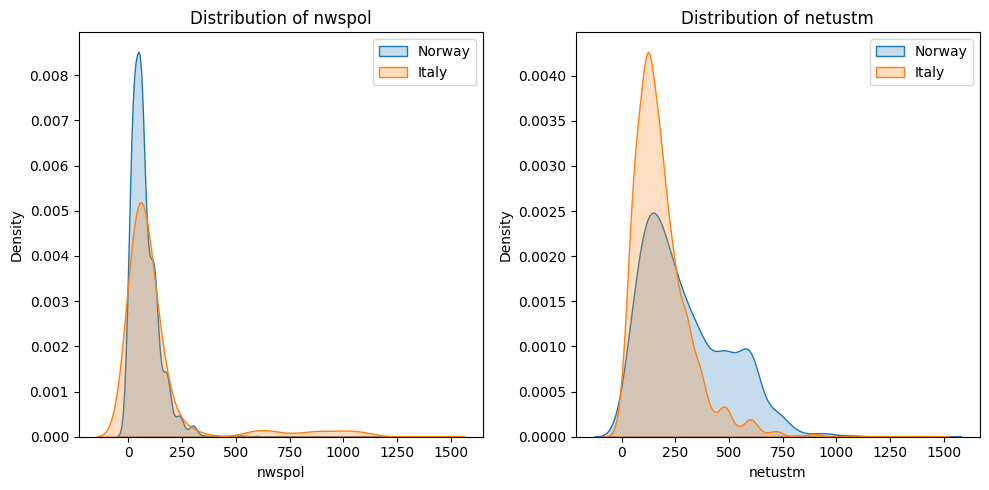

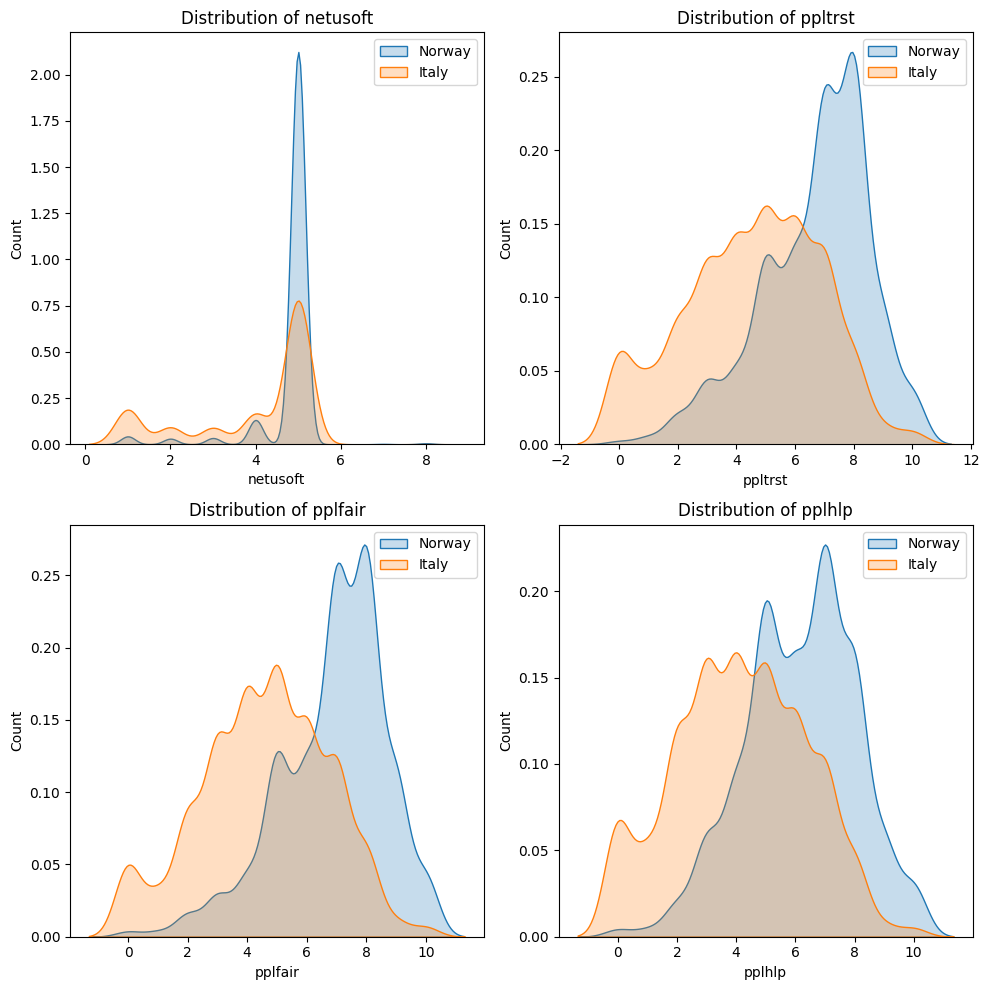

In [11]:
from functions import *
compare_graphs()